In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [4]:
longterm_frgn = pd.read_csv('/content/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding = 'cp949')
food_waste_month = pd.read_csv('food_waste_month.csv', encoding = 'cp949')

Y 데이터 업로드 및 전처리 

In [5]:
food_waste_month

,base_date,emd_nm,sum(em_cnt),sum(em_g),sum(pay_amt)
0,2018-01,건입동,18416,45646550,1364804
1,2018-01,남원읍,9570,42437700,1270773
2,2018-01,노형동,113990,265018400,7883340
3,2018-01,대륜동,21666,57612600,1676850
4,2018-01,대정읍,10185,38885550,1164122
...,...,...,...,...,...
1661,2021-06,표선면,10751,42453750,1271419
1662,2021-06,한경면,8031,27060150,809898
1663,2021-06,한림읍,25653,82746990,2476292
1664,2021-06,화북동,66088,110750050,3306029


In [6]:
food_waste_month['base_date'] = pd.to_datetime(food_waste_month['base_date'])
food_waste_month['year'] = food_waste_month['base_date'].dt.year
food_waste_month['month'] = food_waste_month['base_date'].dt.month

In [7]:
food_waste_month = food_waste_month[['year', 'month', 'emd_nm', 'sum(em_g)']]

In [8]:
food_waste_month

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,42453750
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


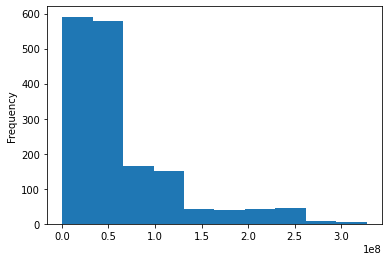

In [9]:
food_waste_month['sum(em_g)'].plot.hist()

In [10]:
food_waste_month['sum(em_g)'] = np.log(food_waste_month[['sum(em_g)']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


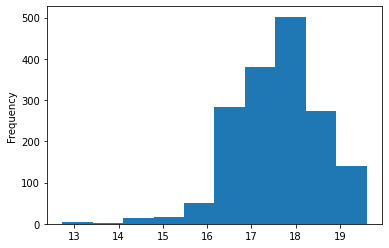

In [11]:
food_waste_month['sum(em_g)'].plot.hist()

In [12]:
scaler = StandardScaler()
food_waste_month['sum(em_g)'] = scaler.fit_transform(food_waste_month[['sum(em_g)']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
food_waste_month

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,0.064537
1,2018,1,남원읍,-0.011915
2,2018,1,노형동,1.909326
3,2018,1,대륜동,0.308722
4,2018,1,대정읍,-0.103599
...,...,...,...,...
1661,2021,6,표선면,-0.011518
1662,2021,6,한경면,-0.483871
1663,2021,6,한림읍,0.688454
1664,2021,6,화북동,0.994181


long_term데이터 업로드 및 전처리

In [14]:
longterm_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1.0,CAN,제주시,50110250.0,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1.0,CHN,제주시,50110250.0,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1.0,CHN,제주시,50110250.0,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1.0,DEU,제주시,50110250.0,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1.0,ETC,제주시,50110250.0,한림읍,15.9184,0.0000,2.8758,제주


In [15]:
longterm_frgn['base_date'] = pd.to_datetime(longterm_frgn['base_date'], errors="ignore")
longterm_frgn['year'] = longterm_frgn['base_date'].dt.year
longterm_frgn['month'] = longterm_frgn['base_date'].dt.month

In [16]:
longterm_frgn = longterm_frgn.groupby(['year', 'month', 'emd_nm', 'time', 'nationality', 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']).sum().reset_index()

In [17]:
longterm_frgn.head()

,year,month,emd_nm,time,nationality,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,emd_cd
0,2018,1,건입동,1.0,CHN,0.0000,7.8695,34.2308,50110590.0
1,2018,1,건입동,1.0,CHN,0.0000,15.7955,51.5305,50110590.0
2,2018,1,건입동,1.0,CHN,47.3688,7.8695,22.8205,50110590.0
3,2018,1,건입동,1.0,CHN,71.3084,7.8978,57.2561,50110590.0
4,2018,1,건입동,1.0,ETC,0.0000,0.0000,2.8637,50110590.0


In [18]:
longterm_frgn.loc[:, ['time','resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].corr()

,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,1.000000,-0.015079,0.015205,0.025538
resd_pop_cnt,-0.015079,1.000000,0.705208,0.627568
work_pop_cnt,0.015205,0.705208,1.000000,0.611472
visit_pop_cnt,0.025538,0.627568,0.611472,1.000000


In [19]:
longterm_frgn1 = longterm_frgn.copy()
longterm_frgn2 = longterm_frgn.copy()
longterm_frgn3 = longterm_frgn.copy()

In [20]:
# 더미변수 처리

In [25]:
longterm_frgn = pd.get_dummies(longterm_frgn, columns = ['time'])
longterm_frgn = pd.get_dummies(longterm_frgn, columns = ['nationality'] )

In [26]:
longterm_frgn.head()

,year,month,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,emd_cd,time_1.0,time_2.0,time_3.0,time_4.0,time_5.0,time_6.0,time_7.0,time_8.0,time_9.0,time_10.0,time_11.0,time_12.0,time_13.0,time_14.0,time_15.0,time_16.0,time_17.0,time_18.0,time_19.0,time_20.0,time_21.0,time_22.0,time_23.0,time_24.0,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM
0,2018,1,건입동,0.0000,7.8695,34.2308,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,0.0000,15.7955,51.5305,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,47.3688,7.8695,22.8205,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,71.3084,7.8978,57.2561,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,0.0000,0.0000,2.8637,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
longterm_frgn['1am_cnt'] = longterm_frgn['time_1.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['2am_cnt'] = longterm_frgn['time_2.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['3am_cnt'] = longterm_frgn['time_3.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['4am_cnt'] = longterm_frgn['time_4.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['5am_cnt'] = longterm_frgn['time_5.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['6am_cnt'] = longterm_frgn['time_6.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['7am_cnt'] = longterm_frgn['time_7.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['8am_cnt'] = longterm_frgn['time_8.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['9am_cnt'] = longterm_frgn['time_9.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['10am_cnt'] = longterm_frgn['time_10.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['11am_cnt'] = longterm_frgn['time_11.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['12pm_cnt'] = longterm_frgn['time_12.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['1pm_cnt'] = longterm_frgn['time_13.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['2pm_cnt'] = longterm_frgn['time_14.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['3pm_cnt'] = longterm_frgn['time_15.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['4pm_cnt'] = longterm_frgn['time_16.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['5pm_cnt'] = longterm_frgn['time_17.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['6pm_cnt'] = longterm_frgn['time_18.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['7pm_cnt'] = longterm_frgn['time_19.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['8pm_cnt'] = longterm_frgn['time_20.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['9pm_cnt'] = longterm_frgn['time_21.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['10pm_cnt'] = longterm_frgn['time_22.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['11pm_cnt'] = longterm_frgn['time_23.0'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['12am_cnt'] = longterm_frgn['time_24.0'] * longterm_frgn['resd_pop_cnt']

In [107]:
longterm_frgn['AUS_cnt'] = longterm_frgn['nationality_AUS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['BGD_cnt'] = longterm_frgn['nationality_BGD'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['CAN_cnt'] = longterm_frgn['nationality_CAN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['CHN_cnt'] = longterm_frgn['nationality_CHN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['DEU_cnt'] = longterm_frgn['nationality_DEU'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['ETC_cnt'] = longterm_frgn['nationality_ETC'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['FRA_cnt'] = longterm_frgn['nationality_FRA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['GBR_cnt'] = longterm_frgn['nationality_GBR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['IDN_cnt'] = longterm_frgn['nationality_IDN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['IND_cnt'] = longterm_frgn['nationality_IND'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['JPN_cnt'] = longterm_frgn['nationality_JPN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KAZ_cnt'] = longterm_frgn['nationality_KAZ'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KGZ_cnt'] = longterm_frgn['nationality_KGZ'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KHM_cnt'] = longterm_frgn['nationality_KHM'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['LKA_cnt'] = longterm_frgn['nationality_LKA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MGL_cnt'] = longterm_frgn['nationality_MGL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MMR_cnt'] = longterm_frgn['nationality_MMR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MYS_cnt'] = longterm_frgn['nationality_MYS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['NPL_cnt'] = longterm_frgn['nationality_NPL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['NZL_cnt'] = longterm_frgn['nationality_NZL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['PAK_cnt'] = longterm_frgn['nationality_PAK'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['PHL_cnt'] = longterm_frgn['nationality_PHL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['RUS_cnt'] = longterm_frgn['nationality_RUS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['THA_cnt'] = longterm_frgn['nationality_THA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['TWN_cnt'] = longterm_frgn['nationality_TWN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['UKR_cnt'] = longterm_frgn['nationality_UKR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['USA_cnt'] = longterm_frgn['nationality_USA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['UZB_cnt'] = longterm_frgn['nationality_UZB'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['VNM_cnt'] = longterm_frgn['nationality_VNM'] * longterm_frgn['resd_pop_cnt']


In [110]:
longterm_frgn = longterm_frgn.groupby(['year', 'month', 'emd_nm'])['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt', '5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt', '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', 
                                                                   '2pm_cnt','3pm_cnt', '4pm_cnt', '5pm_cnt', '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt',
                                                                   'AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [109]:
longterm_frgn.head()

,year,month,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,emd_cd,time_1.0,time_2.0,time_3.0,time_4.0,time_5.0,time_6.0,time_7.0,time_8.0,time_9.0,time_10.0,time_11.0,time_12.0,time_13.0,time_14.0,time_15.0,time_16.0,time_17.0,time_18.0,time_19.0,time_20.0,time_21.0,time_22.0,time_23.0,time_24.0,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NPL,...,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,0.0000,7.8695,34.2308,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,1,건입동,0.0000,15.7955,51.5305,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,1,건입동,47.3688,7.8695,22.8205,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.3688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,1,건입동,71.3084,7.8978,57.2561,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.3084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1,건입동,0.0000,0.0000,2.8637,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# 시간 더미변수 

In [23]:
longterm_frgn1 = pd.get_dummies(longterm_frgn1, columns = ['time'])

In [29]:
longterm_frgn1['1am_cnt'] = longterm_frgn1['time_1.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['2am_cnt'] = longterm_frgn1['time_2.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['3am_cnt'] = longterm_frgn1['time_3.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['4am_cnt'] = longterm_frgn1['time_4.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['5am_cnt'] = longterm_frgn1['time_5.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['6am_cnt'] = longterm_frgn1['time_6.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['7am_cnt'] = longterm_frgn1['time_7.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['8am_cnt'] = longterm_frgn1['time_8.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['9am_cnt'] = longterm_frgn1['time_9.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['10am_cnt'] = longterm_frgn1['time_10.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['11am_cnt'] = longterm_frgn1['time_11.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['12pm_cnt'] = longterm_frgn1['time_12.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['1pm_cnt'] = longterm_frgn1['time_13.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['2pm_cnt'] = longterm_frgn1['time_14.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['3pm_cnt'] = longterm_frgn1['time_15.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['4pm_cnt'] = longterm_frgn1['time_16.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['5pm_cnt'] = longterm_frgn1['time_17.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['6pm_cnt'] = longterm_frgn1['time_18.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['7pm_cnt'] = longterm_frgn1['time_19.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['8pm_cnt'] = longterm_frgn1['time_20.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['9pm_cnt'] = longterm_frgn1['time_21.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['10pm_cnt'] = longterm_frgn1['time_22.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['11pm_cnt'] = longterm_frgn1['time_23.0'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['12am_cnt'] = longterm_frgn1['time_24.0'] * longterm_frgn1['resd_pop_cnt']

In [30]:
longterm_frgn1

,year,month,emd_nm,nationality,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,emd_cd,time_1.0,time_2.0,time_3.0,time_4.0,time_5.0,time_6.0,time_7.0,time_8.0,time_9.0,time_10.0,time_11.0,time_12.0,time_13.0,time_14.0,time_15.0,time_16.0,time_17.0,time_18.0,time_19.0,time_20.0,time_21.0,time_22.0,time_23.0,time_24.0,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
0,2018,1,건입동,CHN,0.0000,7.8695,34.2308,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,2018,1,건입동,CHN,0.0000,15.7955,51.5305,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,2018,1,건입동,CHN,47.3688,7.8695,22.8205,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47.3688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,2018,1,건입동,CHN,71.3084,7.8978,57.2561,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71.3084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,2018,1,건입동,ETC,0.0000,0.0000,2.8637,50110590.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,2018,1,효돈동,LKA,0.0000,0.0000,5.7030,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
16144,2018,1,효돈동,LKA,7.8918,0.0000,0.0000,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8918
16145,2018,1,효돈동,MMR,0.0000,0.0000,4.2128,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
16146,2018,1,효돈동,PHL,0.0000,8.7520,0.0000,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [31]:
longterm_frgn1 = longterm_frgn1.groupby(['year', 'month', 'emd_nm'])['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt','5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt', '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', 
                                                                   '2pm_cnt','3pm_cnt', '4pm_cnt', '5pm_cnt', '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [32]:
longterm_frgn1

,year,month,emd_nm,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
0,2018,1,건입동,432.2589,196.6941,183.3233,188.7795,188.8245,188.9149,183.4810,189.2241,206.6925,206.9413,200.3061,203.5394,191.2123,188.6678,172.5110,177.9733,172.6820,154.8585,146.6409,173.9539,166.5183,177.2686,195.7487,225.8126
1,2018,1,구좌읍,673.2577,288.0059,281.5727,281.6372,281.7134,281.8338,272.2228,275.3518,266.5273,268.5717,274.4622,254.9258,269.1037,279.7998,282.6773,295.5406,296.0401,336.4264,324.1761,331.4155,310.5468,346.9812,356.8095,383.4598
2,2018,1,남원읍,606.7459,285.5981,291.2980,291.3637,299.9073,290.3640,305.3966,305.5923,278.0305,302.1944,275.4187,274.0821,273.6244,273.0162,272.9522,307.6751,300.3378,291.6231,293.3738,291.1325,280.0184,278.3168,284.5417,308.9970
3,2018,1,노형동,4229.6909,2047.4912,2068.0499,2076.5371,2077.0628,2053.5519,2006.1101,1941.4495,1932.3007,1726.5028,1690.8171,1612.3537,1580.1611,1530.3938,1554.2872,1516.5117,1599.3665,1652.2875,1765.3305,1772.9640,1820.1090,1819.2369,1909.3361,2234.5833
4,2018,1,대륜동,310.7330,134.2310,126.3288,126.3207,126.3441,126.3380,114.4749,94.3771,114.2910,114.6289,120.5209,118.2219,112.2764,114.1634,114.1061,105.7535,129.2346,121.2438,126.6952,122.9061,122.9671,130.1800,129.6829,185.2292
5,2018,1,대정읍,2067.6698,1031.7694,1027.2736,1027.4248,1027.3923,1020.5509,1008.0521,988.1211,966.5787,935.0475,923.1548,884.6866,874.1083,872.6973,812.4819,826.8690,830.1036,819.3761,879.4922,863.6708,842.6291,870.2351,898.7388,1056.8805
6,2018,1,대천동,368.6129,174.0593,174.1496,174.2058,174.1999,174.2563,160.5423,117.3391,127.1320,117.4180,109.4998,108.9875,101.0840,109.5519,101.5988,127.3477,113.5836,116.2446,120.3909,102.6103,122.8441,149.1552,167.4986,193.9489
7,2018,1,도두동,185.1410,93.6694,93.6802,93.6733,93.6806,93.7016,93.7125,93.7382,85.9039,78.0226,70.0874,55.8049,65.5915,55.8407,70.1058,55.8030,55.7880,77.9492,85.9103,96.0650,80.2246,80.2661,80.3366,91.3313
8,2018,1,동홍동,722.8522,300.3583,305.9889,306.0244,321.7426,321.8034,306.9890,297.6843,276.4509,282.6652,265.3626,220.6670,232.5350,224.6256,241.6893,247.7628,209.8008,261.2909,271.1079,273.8813,255.8780,269.1728,274.8991,406.0365
9,2018,1,봉개동,177.0040,81.2847,81.2842,81.2879,81.2807,81.3211,78.9694,67.3186,59.4283,46.0248,53.9634,53.9664,37.1798,37.1532,37.1414,45.0616,45.0891,53.0330,61.1054,59.3319,58.8162,72.4438,73.9620,95.5438


In [33]:
longterm_frgn1[['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt', '5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt'
                                   , '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', '2pm_cnt', '3pm_cnt', '4pm_cnt', '5pm_cnt',
                                   '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt']].corr().head()

,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
1am_cnt,1.000000,0.992077,0.999535,0.999667,0.999640,0.999572,0.999278,0.998751,0.998803,0.998176,0.998267,0.997180,0.997006,0.996772,0.997490,0.995743,0.995998,0.996716,0.997323,0.997866,0.997963,0.997772,0.998042,0.999435
2am_cnt,0.992077,1.000000,0.992927,0.992096,0.991839,0.992850,0.991986,0.992596,0.992411,0.992805,0.993959,0.993911,0.991994,0.993489,0.992571,0.992352,0.992713,0.993864,0.993231,0.993798,0.993638,0.992589,0.990798,0.988961
3am_cnt,0.999535,0.992927,1.000000,0.999899,0.999702,0.999704,0.999265,0.998526,0.998459,0.997520,0.997693,0.996629,0.996215,0.995961,0.996457,0.994623,0.995166,0.996307,0.997028,0.997352,0.997220,0.996492,0.996737,0.998149
4am_cnt,0.999667,0.992096,0.999899,1.000000,0.999877,0.999794,0.999477,0.998788,0.998713,0.997702,0.997778,0.996750,0.996429,0.996078,0.996657,0.994788,0.995229,0.996149,0.996925,0.997264,0.997324,0.996773,0.997080,0.998591
5am_cnt,0.999640,0.991839,0.999702,0.999877,1.000000,0.999872,0.999662,0.999152,0.999105,0.997860,0.997844,0.996783,0.996360,0.996157,0.996669,0.994951,0.995419,0.996162,0.997097,0.997208,0.997383,0.996841,0.997161,0.998727


In [34]:
# 시간은 모두 높은 상관관계를 갖고 있기 때문에 1시 데이터 사용  

In [36]:
# longterm_frgn['resd_pop_time'] = longterm_frgn['1am_cnt'] 

In [35]:
# 국적 더미변수 

In [37]:
longterm_frgn2 = pd.get_dummies(longterm_frgn2, columns = ['nationality'])

In [38]:
longterm_frgn2

,year,month,emd_nm,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,emd_cd,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM
0,2018,1,건입동,1.0,0.0000,7.8695,34.2308,50110590.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,1.0,0.0000,15.7955,51.5305,50110590.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,1.0,47.3688,7.8695,22.8205,50110590.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,1.0,71.3084,7.8978,57.2561,50110590.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,1.0,0.0000,0.0000,2.8637,50110590.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,2018,1,효돈동,24.0,0.0000,0.0000,5.7030,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16144,2018,1,효돈동,24.0,7.8918,0.0000,0.0000,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16145,2018,1,효돈동,24.0,0.0000,0.0000,4.2128,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16146,2018,1,효돈동,24.0,0.0000,8.7520,0.0000,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
longterm_frgn2['AUS_cnt'] = longterm_frgn2['nationality_AUS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['BGD_cnt'] = longterm_frgn2['nationality_BGD'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['CAN_cnt'] = longterm_frgn2['nationality_CAN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['CHN_cnt'] = longterm_frgn2['nationality_CHN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['DEU_cnt'] = longterm_frgn2['nationality_DEU'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['ETC_cnt'] = longterm_frgn2['nationality_ETC'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['FRA_cnt'] = longterm_frgn2['nationality_FRA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['GBR_cnt'] = longterm_frgn2['nationality_GBR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['IDN_cnt'] = longterm_frgn2['nationality_IDN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['IND_cnt'] = longterm_frgn2['nationality_IND'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['JPN_cnt'] = longterm_frgn2['nationality_JPN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KAZ_cnt'] = longterm_frgn2['nationality_KAZ'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KGZ_cnt'] = longterm_frgn2['nationality_KGZ'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KHM_cnt'] = longterm_frgn2['nationality_KHM'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['LKA_cnt'] = longterm_frgn2['nationality_LKA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MGL_cnt'] = longterm_frgn2['nationality_MGL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MMR_cnt'] = longterm_frgn2['nationality_MMR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MYS_cnt'] = longterm_frgn2['nationality_MYS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['NPL_cnt'] = longterm_frgn2['nationality_NPL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['NZL_cnt'] = longterm_frgn2['nationality_NZL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['PAK_cnt'] = longterm_frgn2['nationality_PAK'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['PHL_cnt'] = longterm_frgn2['nationality_PHL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['RUS_cnt'] = longterm_frgn2['nationality_RUS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['THA_cnt'] = longterm_frgn2['nationality_THA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['TWN_cnt'] = longterm_frgn2['nationality_TWN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['UKR_cnt'] = longterm_frgn2['nationality_UKR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['USA_cnt'] = longterm_frgn2['nationality_USA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['UZB_cnt'] = longterm_frgn2['nationality_UZB'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['VNM_cnt'] = longterm_frgn2['nationality_VNM'] * longterm_frgn2['resd_pop_cnt']

In [43]:
longterm_frgn2

,year,month,emd_nm,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,emd_cd,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,1.0,0.0000,7.8695,34.2308,50110590.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,1,건입동,1.0,0.0000,15.7955,51.5305,50110590.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,1,건입동,1.0,47.3688,7.8695,22.8205,50110590.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,47.3688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,1,건입동,1.0,71.3084,7.8978,57.2561,50110590.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,71.3084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1,건입동,1.0,0.0000,0.0000,2.8637,50110590.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,2018,1,효돈동,24.0,0.0000,0.0000,5.7030,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16144,2018,1,효돈동,24.0,7.8918,0.0000,0.0000,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8918,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16145,2018,1,효돈동,24.0,0.0000,0.0000,4.2128,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16146,2018,1,효돈동,24.0,0.0000,8.7520,0.0000,50130550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
longterm_frgn2 = longterm_frgn2.groupby(['year', 'month', 'emd_nm'])['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [46]:
longterm_frgn2.head()

,year,month,emd_nm,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,0.0000,0.0,0.0000,1132.5148,0.0,7.9187,0.0000,0.0000,1256.0732,0.0,525.1991,0.0,0.0,0.0000,173.6674,0.0000,0.0000,0.0,227.0482,0.0000,0.0,432.3237,0.0000,0.0000,343.9542,0.0,0.0000,0.000,614.1282
1,2018,1,구좌읍,0.0000,0.0,94.3054,2130.6581,0.0,0.0000,0.0000,0.0000,365.8954,0.0,115.6007,0.0,0.0,917.7897,703.7523,0.0000,35.5327,0.0,1011.1469,0.0000,0.0,621.8417,177.3557,160.3597,0.0000,0.0,185.2115,35.029,958.5803
2,2018,1,남원읍,0.0000,0.0,0.0000,1504.9394,0.0,0.0000,0.0000,0.0000,1129.0391,0.0,0.0000,0.0,0.0,955.9005,1920.3048,0.0000,128.0289,0.0,811.9853,0.0000,0.0,433.7852,0.0000,0.0000,0.0000,0.0,14.6636,0.000,362.9538
3,2018,1,노형동,205.0671,0.0,503.2393,34911.1623,0.0,496.7634,33.5742,151.7439,16.8076,0.0,477.0820,0.0,0.0,433.5535,110.8327,371.7754,70.8225,0.0,356.7792,0.0000,0.0,216.1617,255.0436,285.5937,1217.9543,0.0,1534.2499,26.257,4542.0220
4,2018,1,대륜동,73.7518,0.0,182.7335,1377.9574,0.0,222.5175,0.0000,78.0910,0.0000,0.0,124.0464,0.0,0.0,139.0282,0.0000,0.0000,0.0000,0.0,0.0000,145.7424,0.0,155.3996,28.4736,0.0000,28.5588,0.0,584.9484,0.000,0.0000


In [47]:
longterm_frgn2[['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt']].corr()

,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
AUS_cnt,1.000000,0.686128,0.783581,0.249339,0.570646,0.486226,0.389294,0.618344,-0.010104,0.669075,0.209041,0.227334,-0.123963,0.298385,0.109884,0.292435,-0.090403,0.146858,0.080593,0.520097,0.463527,0.029790,0.017841,0.419018,0.037201,0.257726,0.578863,-0.006318,0.347409
BGD_cnt,0.686128,1.000000,0.537764,0.232979,-0.032252,0.223132,-0.049726,0.042072,0.019091,0.842096,0.221504,0.315902,-0.059876,0.430948,0.206528,0.275582,-0.026911,0.049522,0.104081,0.285296,0.754136,0.052589,0.064218,0.338537,-0.072588,0.350383,0.090627,-0.095230,0.250107
CAN_cnt,0.783581,0.537764,1.000000,0.411056,0.370797,0.692334,0.494580,0.615594,0.136444,0.520969,0.402149,0.436558,-0.027764,0.459792,0.237976,0.465390,0.053726,0.202695,0.249685,0.695691,0.288372,0.214258,0.212831,0.466895,0.187198,0.382628,0.777976,0.172980,0.616750
CHN_cnt,0.249339,0.232979,0.411056,1.000000,0.005950,0.674766,0.088736,0.198274,0.075342,0.288398,0.576958,0.474944,0.571071,0.231588,0.148294,0.588008,0.204441,0.644688,0.203500,0.052470,0.161727,0.217167,0.863276,0.244751,0.872623,0.070896,0.334559,0.374296,0.333234
DEU_cnt,0.570646,-0.032252,0.370797,0.005950,1.000000,0.339463,0.694074,0.864220,-0.052731,0.095854,0.072442,-0.045349,-0.044202,-0.084024,-0.061441,0.074217,-0.069121,0.225217,0.088653,0.300866,-0.038257,-0.003950,-0.051450,0.268199,-0.053586,-0.033197,0.623633,0.192104,0.058075
ETC_cnt,0.486226,0.223132,0.692334,0.674766,0.339463,1.000000,0.269085,0.514019,0.212906,0.171542,0.373335,0.638129,0.339214,0.459711,0.185861,0.437632,0.331542,0.623185,0.372367,0.648576,0.014925,0.353972,0.609727,0.495577,0.520941,0.339281,0.700986,0.331987,0.581258
FRA_cnt,0.389294,-0.049726,0.494580,0.088736,0.694074,0.269085,1.000000,0.670508,-0.081066,0.039495,0.469684,-0.069917,-0.068149,-0.032323,-0.092196,0.273083,-0.098378,0.119941,0.128409,0.174103,-0.058983,-0.092782,0.007206,0.156069,-0.015254,-0.051181,0.598712,0.486981,0.090971
GBR_cnt,0.618344,0.042072,0.615594,0.198274,0.864220,0.514019,0.670508,1.000000,0.085482,0.304108,0.188467,0.041138,0.057346,-0.036673,0.167310,0.313113,-0.016761,0.280677,0.084041,0.468346,0.026335,0.126985,0.085773,0.222084,0.138504,-0.066520,0.854655,0.255909,0.281351
IDN_cnt,-0.010104,0.019091,0.136444,0.075342,-0.052731,0.212906,-0.081066,0.085482,1.000000,0.016070,0.061915,0.108403,0.351901,0.364867,0.665797,0.678062,0.043317,-0.052749,0.628078,0.170312,-0.027043,0.731837,0.052754,0.575140,-0.040452,0.122189,0.283917,0.052892,0.728793
IND_cnt,0.669075,0.842096,0.520969,0.288398,0.095854,0.171542,0.039495,0.304108,0.016070,1.000000,0.239817,0.011889,-0.000177,0.095810,0.341079,0.398113,-0.032532,0.036866,-0.082162,0.123013,0.802402,0.023155,0.031997,0.107195,0.041559,-0.042531,0.242654,-0.024023,0.139212


In [48]:
longterm_frgn2['ETC_resd_pop_cnt'] = longterm_frgn2['AUS_cnt']+longterm_frgn2['BGD_cnt']+longterm_frgn2['CAN_cnt']+longterm_frgn2['CHN_cnt']+longterm_frgn2['DEU_cnt']+longterm_frgn2['ETC_cnt']+longterm_frgn2['GBR_cnt']+longterm_frgn2['IDN_cnt']+longterm_frgn2['IND_cnt']+longterm_frgn2['JPN_cnt']+longterm_frgn2['KAZ_cnt']+longterm_frgn2['KGZ_cnt']+longterm_frgn2['MGL_cnt']+longterm_frgn2['MYS_cnt']+longterm_frgn2['NPL_cnt']+longterm_frgn2['NZL_cnt']+longterm_frgn2['PAK_cnt']+longterm_frgn2['PHL_cnt']+longterm_frgn2['RUS_cnt']+longterm_frgn2['THA_cnt']+longterm_frgn2['TWN_cnt']+longterm_frgn2['USA_cnt']+longterm_frgn2['VNM_cnt']

In [49]:
longterm_frgn2 = longterm_frgn2.loc[:, ['year', 'month', 'emd_nm', 'FRA_cnt', 'KHM_cnt', 'LKA_cnt', 'MMR_cnt', 'UZB_cnt', 'UKR_cnt', 'ETC_resd_pop_cnt']]

In [51]:
longterm_frgn2.head()

,year,month,emd_nm,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,ETC_resd_pop_cnt
0,2018,1,건입동,0.0000,0.0000,173.6674,0.0000,0.000,0.0,4539.1601
1,2018,1,구좌읍,0.0000,917.7897,703.7523,35.5327,35.029,0.0,5820.9554
2,2018,1,남원읍,0.0000,955.9005,1920.3048,128.0289,0.000,0.0,4257.3664
3,2018,1,노형동,33.5742,433.5535,110.8327,70.8225,26.257,0.0,45541.4454
4,2018,1,대륜동,0.0000,139.0282,0.0000,0.0000,0.000,0.0,3002.2204


In [53]:
longterm_frgn2['resd_pop_time'] = longterm_frgn1['1am_cnt']

In [54]:
longterm_frgn3 = longterm_frgn2.copy()

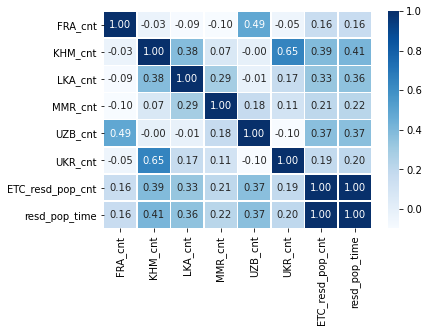

In [55]:
sns.heatmap(data=longterm_frgn3.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [56]:
longterm_frgn_file = longterm_frgn2.drop('resd_pop_time', axis = 1)

In [58]:
longterm_frgn_file.to_csv('longterm_frgn.csv', encoding = 'cp949', index = None)

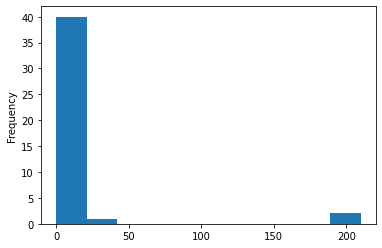

In [59]:
longterm_frgn2['FRA_cnt'].plot.hist()

In [68]:
longterm_frgn2['FRA_cnt'].describe()

count     43.000000
mean      10.542302
std       44.838613
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      209.872400
Name: FRA_cnt, dtype: float64

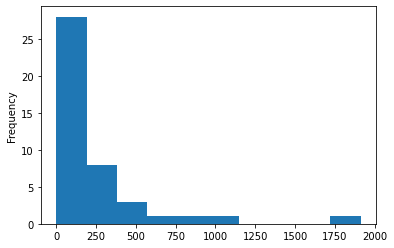

In [60]:
longterm_frgn2['KHM_cnt'].plot.hist()

In [69]:
longterm_frgn2['KHM_cnt'].describe()

count      43.000000
mean      194.746512
std       361.871053
min         0.000000
25%         0.000000
50%         0.000000
75%       246.333500
max      1910.508100
Name: KHM_cnt, dtype: float64

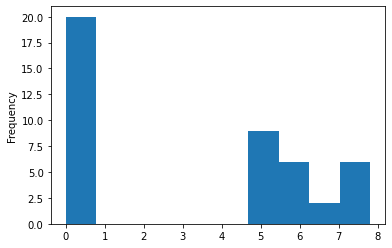

In [83]:
longterm_frgn2['LKA_cnt'].plot.hist()

In [70]:
longterm_frgn2['LKA_cnt'].describe()

count      43.000000
mean      366.904426
std       630.734326
min         0.000000
25%         0.000000
50%       118.693300
75%       335.926550
max      2465.925600
Name: LKA_cnt, dtype: float64

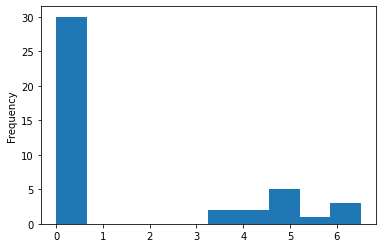

In [82]:
longterm_frgn2['MMR_cnt'].plot.hist()

In [71]:
longterm_frgn2['MMR_cnt'].describe()

count     43.000000
mean      68.253512
std      154.170018
min        0.000000
25%        0.000000
50%        0.000000
75%       56.153500
max      670.580200
Name: MMR_cnt, dtype: float64

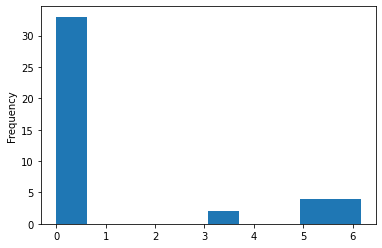

In [81]:
longterm_frgn2['UZB_cnt'].plot.hist()

In [72]:
longterm_frgn2['UZB_cnt'].describe()

count     43.000000
mean      58.422535
std      129.748846
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      470.895500
Name: UZB_cnt, dtype: float64

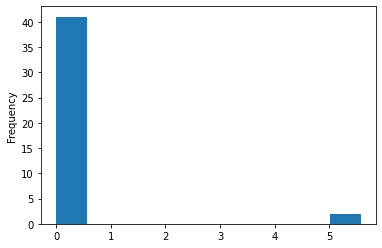

In [80]:
longterm_frgn2['UKR_cnt'].plot.hist()

In [73]:
longterm_frgn2['UKR_cnt'].describe()

count     43.000000
mean       9.913719
std       46.626112
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      261.478900
Name: UKR_cnt, dtype: float64

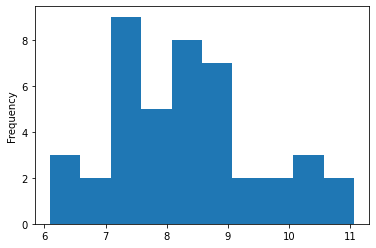

In [79]:
longterm_frgn2['ETC_resd_pop_cnt'].plot.hist()

In [74]:
longterm_frgn2['ETC_resd_pop_cnt'].describe()

count       43.000000
mean      8422.138898
std      12919.716418
min        440.724700
25%       1784.826700
50%       3815.163800
75%       6231.278650
max      64129.799000
Name: ETC_resd_pop_cnt, dtype: float64

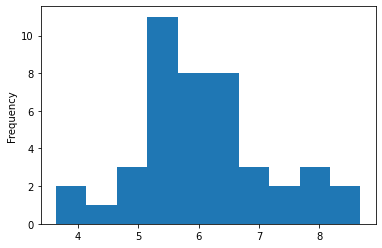

In [78]:
longterm_frgn2['resd_pop_time'].plot.hist()

In [75]:
longterm_frgn2['resd_pop_time'].describe()

count      43.000000
mean      837.955242
std      1186.735390
min        38.177000
25%       212.431750
50%       386.650500
75%       698.054950
max      5873.266400
Name: resd_pop_time, dtype: float64

In [77]:
longterm_frgn2['FRA_cnt'] = np.log(longterm_frgn2['FRA_cnt'] + 1)
longterm_frgn2['KHM_cnt'] = np.log(longterm_frgn2['KHM_cnt'] + 1)
longterm_frgn2['LKA_cnt'] = np.log(longterm_frgn2['LKA_cnt'] + 1)
longterm_frgn2['MMR_cnt'] = np.log(longterm_frgn2['MMR_cnt'] + 1)
longterm_frgn2['UZB_cnt'] = np.log(longterm_frgn2['UZB_cnt'] + 1)
longterm_frgn2['UKR_cnt'] = np.log(longterm_frgn2['UKR_cnt'] + 1)
longterm_frgn2['ETC_resd_pop_cnt'] = np.log(longterm_frgn2['ETC_resd_pop_cnt'])
longterm_frgn2['resd_pop_time'] = np.log(longterm_frgn2['resd_pop_time'])

In [84]:
longtermfrgn_final = longterm_frgn2.copy()

In [94]:
longtermfrgn_final['FRA_cnt'] = scaler.fit_transform(longterm_frgn2[['FRA_cnt']])
longtermfrgn_final['KHM_cnt'] = scaler.fit_transform(longterm_frgn2[['KHM_cnt']])
longtermfrgn_final['LKA_cnt'] = scaler.fit_transform(longterm_frgn2[['LKA_cnt']])
longtermfrgn_final['MMR_cnt'] = scaler.fit_transform(longterm_frgn2[['MMR_cnt']])
longtermfrgn_final['UZB_cnt'] = scaler.fit_transform(longterm_frgn2[['UZB_cnt']])
longtermfrgn_final['UKR_cnt'] = scaler.fit_transform(longterm_frgn2[['UKR_cnt']])
longtermfrgn_final['ETC_resd_pop_cnt'] = scaler.fit_transform(longterm_frgn2[['ETC_resd_pop_cnt']])
longtermfrgn_final['resd_pop_time'] = scaler.fit_transform(longterm_frgn2[['resd_pop_time']])

In [95]:
longtermfrgn_final

,year,month,emd_nm,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,ETC_resd_pop_cnt,resd_pop_time
0,2018,1,건입동,-0.273356,-0.875067,0.627085,-0.644144,-0.538992,-0.220649,0.103083,-0.006826
1,2018,1,구좌읍,-0.273356,1.472923,1.078278,0.877063,1.053491,-0.220649,0.316922,0.389873
2,2018,1,남원읍,-0.273356,1.486909,1.402665,1.410523,-0.538992,-0.220649,0.047980,0.296748
3,2018,1,노형동,3.319578,1.215263,0.482868,1.162849,0.929527,-0.220649,2.085570,2.035169
4,2018,1,대륜동,-0.273356,0.825549,-1.042821,-0.644144,-0.538992,-0.220649,-0.252331,-0.302348
5,2018,1,대정읍,-0.273356,0.959694,1.397328,1.465391,-0.538992,-0.220649,1.424708,1.394415
6,2018,1,대천동,-0.273356,1.146217,-1.042821,-0.644144,-0.538992,-0.220649,-0.210553,-0.149423
7,2018,1,도두동,-0.273356,0.676831,-1.042821,-0.644144,-0.538992,-0.220649,-0.629468,-0.765936
8,2018,1,동홍동,-0.273356,1.279274,0.668631,-0.644144,1.855460,-0.220649,0.365484,0.453506
9,2018,1,봉개동,-0.273356,-0.875067,0.579325,-0.644144,-0.538992,-0.220649,-0.866678,-0.806174


In [96]:
longtermfrgn_final_merge = food_waste_month.merge(longtermfrgn_final, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [97]:
longtermfrgn_final_merge

,year,month,emd_nm,sum(em_g),FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,ETC_resd_pop_cnt,resd_pop_time
0,2018,1,건입동,0.064537,-0.273356,-0.875067,0.627085,-0.644144,-0.538992,-0.220649,0.103083,-0.006826
1,2018,1,남원읍,-0.011915,-0.273356,1.486909,1.402665,1.410523,-0.538992,-0.220649,0.047980,0.296748
2,2018,1,노형동,1.909326,3.319578,1.215263,0.482868,1.162849,0.929527,-0.220649,2.085570,2.035169
3,2018,1,대륜동,0.308722,-0.273356,0.825549,-1.042821,-0.644144,-0.538992,-0.220649,-0.252331,-0.302348
4,2018,1,대정읍,-0.103599,-0.273356,0.959694,1.397328,1.465391,-0.538992,-0.220649,1.424708,1.394415
5,2018,1,대천동,0.238051,-0.273356,1.146217,-1.042821,-0.644144,-0.538992,-0.220649,-0.210553,-0.149423
6,2018,1,도두동,-1.124307,-0.273356,0.676831,-1.042821,-0.644144,-0.538992,-0.220649,-0.629468,-0.765936
7,2018,1,동홍동,1.066900,-0.273356,1.279274,0.668631,-0.644144,1.855460,-0.220649,0.365484,0.453506
8,2018,1,봉개동,-1.487802,-0.273356,-0.875067,0.579325,-0.644144,-0.538992,-0.220649,-0.866678,-0.806174
9,2018,1,삼도1동,0.529026,-0.273356,-0.875067,-1.042821,-0.644144,1.905755,-0.220649,-0.560421,-0.406169


In [99]:
longtermfrgn_x = longtermfrgn_final_merge.loc[:, ['FRA_cnt', 'KHM_cnt', 'LKA_cnt', 'MMR_cnt', 'UZB_cnt', 'UKR_cnt', 'ETC_resd_pop_cnt', 'resd_pop_time']]
longtermfrgn_y = longtermfrgn_final_merge.loc[:, ['sum(em_g)']]

In [100]:
longtermfrgn_x = sm.add_constant(longtermfrgn_x)

In [101]:
model = sm.OLS(longtermfrgn_y, longtermfrgn_x)

In [102]:
result = model.fit()

In [103]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sum(em_g)   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     4.079
Date:                Thu, 26 Aug 2021   Prob (F-statistic):            0.00253
Time:                        12:22:51   Log-Likelihood:                -37.177
No. Observations:                  37   AIC:                             92.35
Df Residuals:                      28   BIC:                             106.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0105      0.129      0.081      0.936      -0.254       0.275
FRA_cnt             -0.0898      0.153     -0.588      0.561      -0.403       0.223
KHM_cnt              0.3789      0.179      2.117      0.043       0.012       0.746
LKA_cnt             -0.1375      0.175     -0.785      0.439      -0.496       0.221
MMR_cnt             -0.2759      0.171     -1.610      0.119      -0.627       0.075
UZB_cnt              0.1243      0.169      0.736      0.468      -0.222       0.470
UKR_cnt             -0.4565      0.135     -3.385      0.002      -0.733      -0.180
ETC_resd_pop_cnt    -0.0876      1.567     -0.056      0.956      -3.298       3.123
resd_pop_time        0.5192      1.682      0.309      0.760      -2.926       3.965
==============================================================================
Omnibus:                        2.905   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.126
Skew:                          -0.585   Prob(JB):                        0.345
Kurtosis:                       3.099   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""